In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
d=pd.read_csv('Plane Price.csv')
d

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0
1,7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0
2,100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0
3,7 AC Champ,Piston,85,88,78.0,37.0,19,620,500.0,850.0,"1,300",800,21/5,35/0,210,1300000.0
4,100 Darter (S.L. Industries),Piston,65,83,74.0,33.0,14,370,632.0,885.0,"1,220",740,21/5,35/0,175,1250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,500 A,Propjet,1000,351,334.0,NaN,3819,"3,242",1930.0,2280.0,"12,050","7,856",43/5,47/8,"1,879",4100000.0
513,100 Darter (S.L. Industries),Propjet,720,312,288.0,89.0,578,"2,380",2280.0,3043.0,"11,200","6,837",43/5,47/8,"1,722",3584000.0
514,520,Propjet,720,290,275.0,87.0,390,"2,236",3230.0,3017.0,"11,200","6,389",43/5,47/8,"1,515",3200000.0
515,2180,Propjet,620,275,270.0,77.0,382,"1,750",2940.0,2446.0,"9,474","5,164",36/8,42/8,"1,336",3240000.0


In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model Name               517 non-null    object 
 1   Engine Type              517 non-null    object 
 2   HP or lbs thr ea engine  517 non-null    object 
 3   Max speed Knots          497 non-null    object 
 4   Rcmnd cruise Knots       507 non-null    float64
 5   Stall Knots dirty        502 non-null    float64
 6   Fuel gal/lbs             517 non-null    int64  
 7   All eng rate of climb    513 non-null    object 
 8   Eng out rate of climb    491 non-null    float64
 9   Takeoff over 50ft        492 non-null    float64
 10  Landing over 50ft        517 non-null    object 
 11  Empty weight lbs         516 non-null    object 
 12  Length ft/in             517 non-null    object 
 13  Wing span ft/in          517 non-null    object 
 14  Range N.M.               4

In [4]:
d.describe()

,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,Eng out rate of climb,Takeoff over 50ft,Price
count,507.000000,502.000000,517.000000,491.000000,492.000000,5.070000e+02
mean,200.792899,60.795817,1419.379110,2065.126273,1743.306911,2.362673e+06
std,104.280532,16.657002,4278.320773,1150.031899,730.009674,1.018731e+06
min,70.000000,27.000000,12.000000,457.000000,500.000000,6.500000e+05
25%,130.000000,50.000000,50.000000,1350.000000,1265.000000,1.600000e+06
50%,169.000000,56.000000,89.000000,1706.000000,1525.000000,2.000000e+06
75%,232.000000,73.000000,335.000000,2357.000000,2145.750000,2.950000e+06
max,511.000000,115.000000,41000.000000,6400.000000,4850.000000,5.100000e+06


In [5]:
d.describe(include="O").T

,count,unique,top,freq
Model Name,517,284,100 Darter (S.L. Industries),234
Engine Type,517,4,Piston,384
HP or lbs thr ea engine,517,117,285,37
Max speed Knots,497,209,157,10
All eng rate of climb,513,264,"1,250",13
Landing over 50ft,517,213,"3,600",16
Empty weight lbs,516,428,"1,525",5
Length ft/in,517,183,25/1,17
Wing span ft/in,517,136,35/10,34
Range N.M.,499,299,550,9


### EDA

<Axes: xlabel='Engine Type', ylabel='count'>

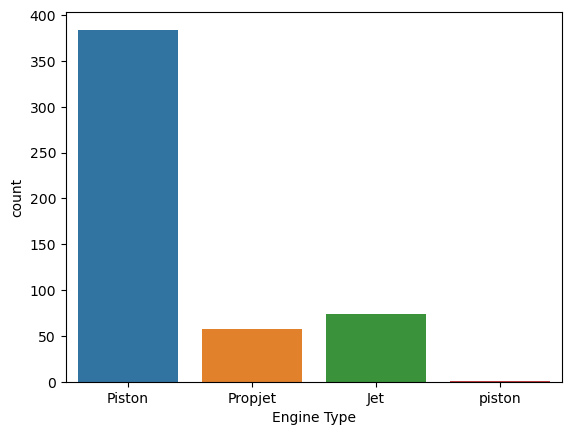

In [6]:
sns.countplot(x='Engine Type', data=d)

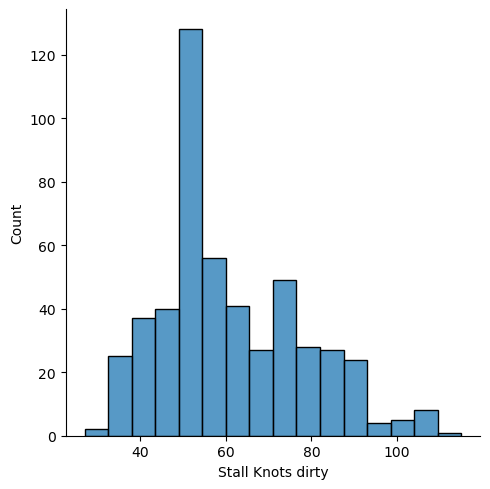

In [7]:
sns.displot(x='Stall Knots dirty',data=d)

In [8]:
d['Fuel gal/lbs']=d['Fuel gal/lbs'].astype(float)

In [9]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model Name               517 non-null    object 
 1   Engine Type              517 non-null    object 
 2   HP or lbs thr ea engine  517 non-null    object 
 3   Max speed Knots          497 non-null    object 
 4   Rcmnd cruise Knots       507 non-null    float64
 5   Stall Knots dirty        502 non-null    float64
 6   Fuel gal/lbs             517 non-null    float64
 7   All eng rate of climb    513 non-null    object 
 8   Eng out rate of climb    491 non-null    float64
 9   Takeoff over 50ft        492 non-null    float64
 10  Landing over 50ft        517 non-null    object 
 11  Empty weight lbs         516 non-null    object 
 12  Length ft/in             517 non-null    object 
 13  Wing span ft/in          517 non-null    object 
 14  Range N.M.               4

In [10]:
d_float=list(d.select_dtypes(float).columns)

In [11]:
d_float

['Rcmnd cruise Knots',
 'Stall Knots dirty',
 'Fuel gal/lbs',
 'Eng out rate of climb',
 'Takeoff over 50ft',
 'Price']

In [12]:
d_cat=list(d.select_dtypes(object).columns)

ValueError: could not convert string to float: '100 Darter (S.L. Industries)'

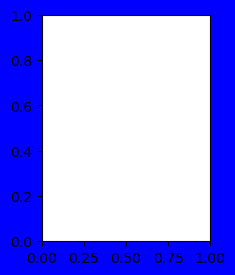

In [13]:
plt.figure(figsize=(10,10), facecolor="blue")
plot=1

for columns in d_cat:
    if plot <=9:
        ax=plt.subplot(3,4,plot)
        sns.countplot(d[columns])
        plt.xlabel(columns, fontsize=10)
        plt.ylabel("count", fontsize=10)
    plot+=1
plt.tight_layout

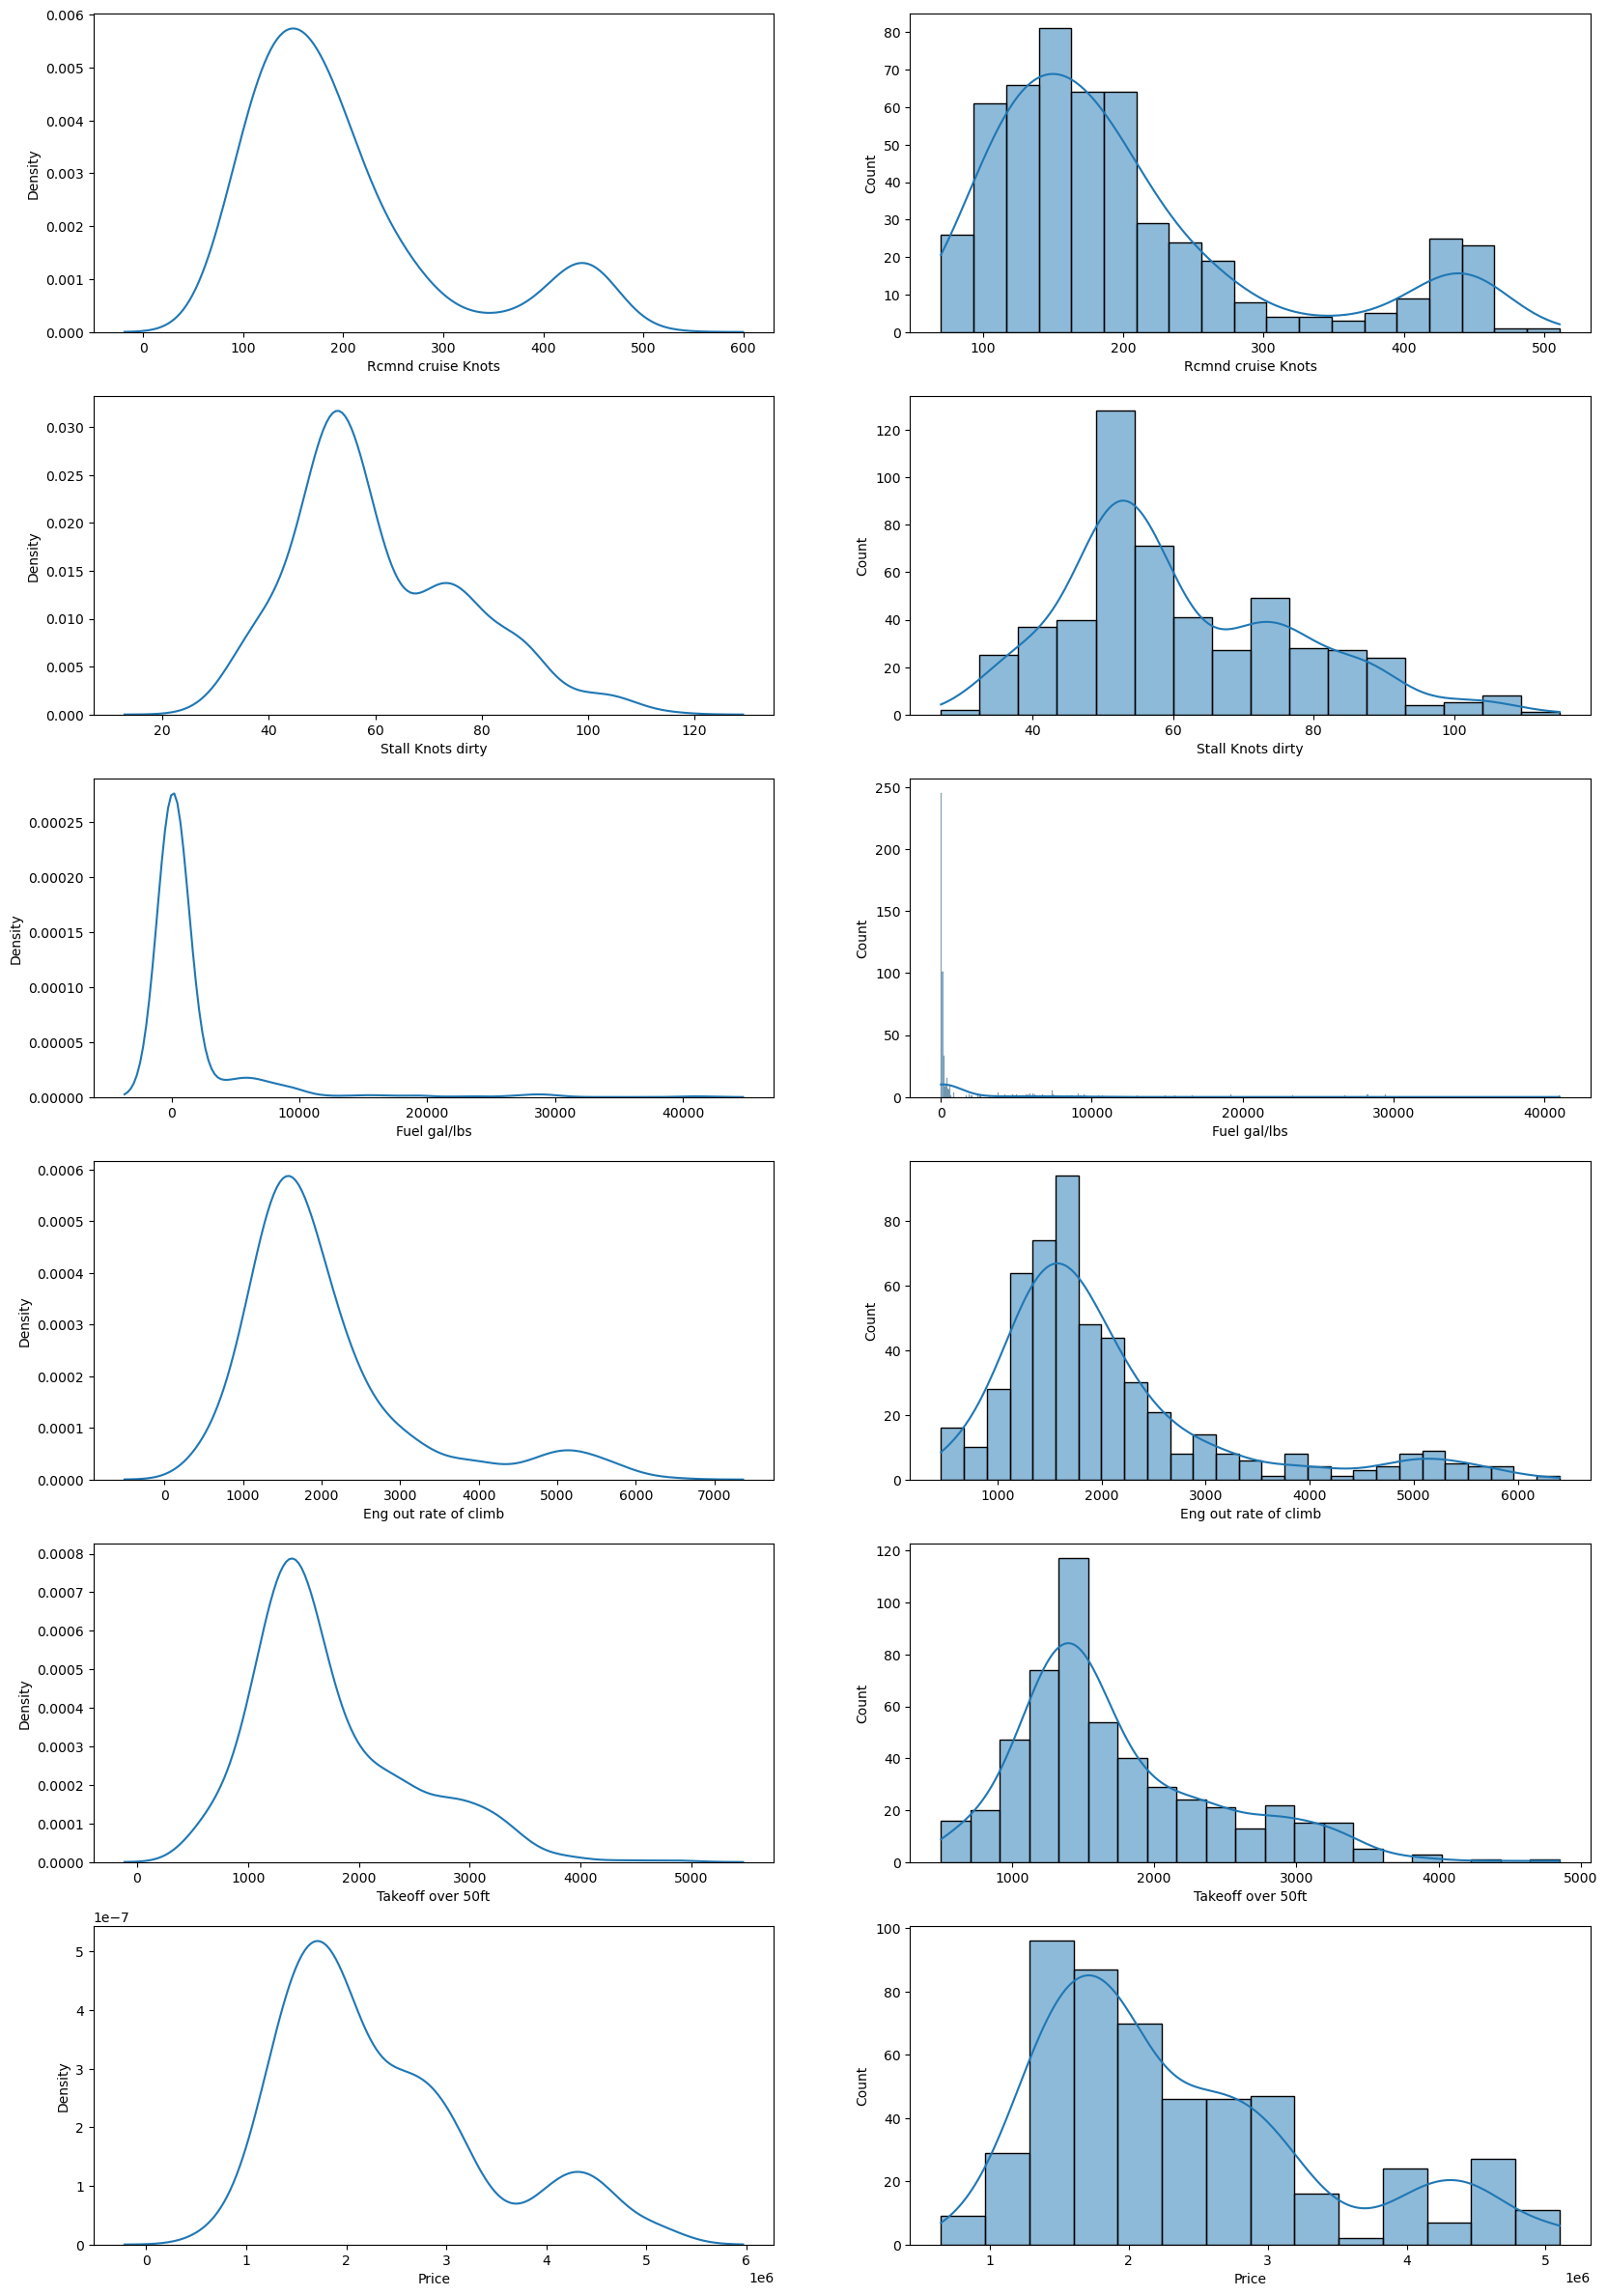

In [15]:
fig,ax=plt.subplots(6,2,figsize=(20,30))
m,n=0,0

for columns in d_float:
    sns.distplot(d[columns],hist=False,ax=ax[m][n])
    sns.histplot(d[columns], kde=True, ax=ax[m][n+1])
    m+=1

In [16]:
d['Rcmnd cruise Knots'].fillna(value=d['Rcmnd cruise Knots'].mean(),inplace=True)
d['Stall Knots dirty'].fillna(value=d['Stall Knots dirty'].median(),inplace=True)
d['Eng out rate of climb'].fillna(value=d['Eng out rate of climb'].median(),inplace=True)
d['Takeoff over 50ft'].fillna(value=d['Takeoff over 50ft'].median(),inplace=True)
d['Price'].fillna(value=d['Price'].mean(),inplace=True)

In [17]:
d.dropna(inplace=True)

In [18]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 475 entries, 0 to 516
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model Name               475 non-null    object 
 1   Engine Type              475 non-null    object 
 2   HP or lbs thr ea engine  475 non-null    object 
 3   Max speed Knots          475 non-null    object 
 4   Rcmnd cruise Knots       475 non-null    float64
 5   Stall Knots dirty        475 non-null    float64
 6   Fuel gal/lbs             475 non-null    float64
 7   All eng rate of climb    475 non-null    object 
 8   Eng out rate of climb    475 non-null    float64
 9   Takeoff over 50ft        475 non-null    float64
 10  Landing over 50ft        475 non-null    object 
 11  Empty weight lbs         475 non-null    object 
 12  Length ft/in             475 non-null    object 
 13  Wing span ft/in          475 non-null    object 
 14  Range N.M.               475 no

In [19]:
d['HP or lbs thr ea engine'] =d['HP or lbs thr ea engine'].str.replace(',','')
d['All eng rate of climb'] =d['All eng rate of climb'].str.replace(',','')
d['Max speed Knots'] =d['Max speed Knots'].str.replace(',','')
d['Landing over 50ft'] =d['Landing over 50ft'].str.replace(',','')
d['Empty weight lbs'] =d['Empty weight lbs'].str.replace(',','')
d['Length ft/in'] =d['Length ft/in'].str.replace(',','')
d['Wing span ft/in'] =d['Wing span ft/in'].str.replace(',','')
d['Range N.M.'] =d['Range N.M.'].str.replace(',','')


In [20]:
values=['HP or lbs thr ea engine',
 'Max speed Knots',
 'All eng rate of climb',
 'Landing over 50ft',
 'Empty weight lbs',
 'Length ft/in',
 'Wing span ft/in',
 'Range N.M.']

for col in values:
    d[col]  = d[col].str.extract('(\d+)')

In [21]:
values=['HP or lbs thr ea engine',
 'Max speed Knots',
 'All eng rate of climb',
 'Landing over 50ft',
 'Empty weight lbs',
 'Length ft/in',
 'Wing span ft/in',
 'Range N.M.']

for col in values:
    d[col]  = d[col].astype('float32')

In [22]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 475 entries, 0 to 516
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model Name               475 non-null    object 
 1   Engine Type              475 non-null    object 
 2   HP or lbs thr ea engine  475 non-null    float32
 3   Max speed Knots          475 non-null    float32
 4   Rcmnd cruise Knots       475 non-null    float64
 5   Stall Knots dirty        475 non-null    float64
 6   Fuel gal/lbs             475 non-null    float64
 7   All eng rate of climb    475 non-null    float32
 8   Eng out rate of climb    475 non-null    float64
 9   Takeoff over 50ft        475 non-null    float64
 10  Landing over 50ft        474 non-null    float32
 11  Empty weight lbs         475 non-null    float32
 12  Length ft/in             474 non-null    float32
 13  Wing span ft/in          474 non-null    float32
 14  Range N.M.               475 no

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

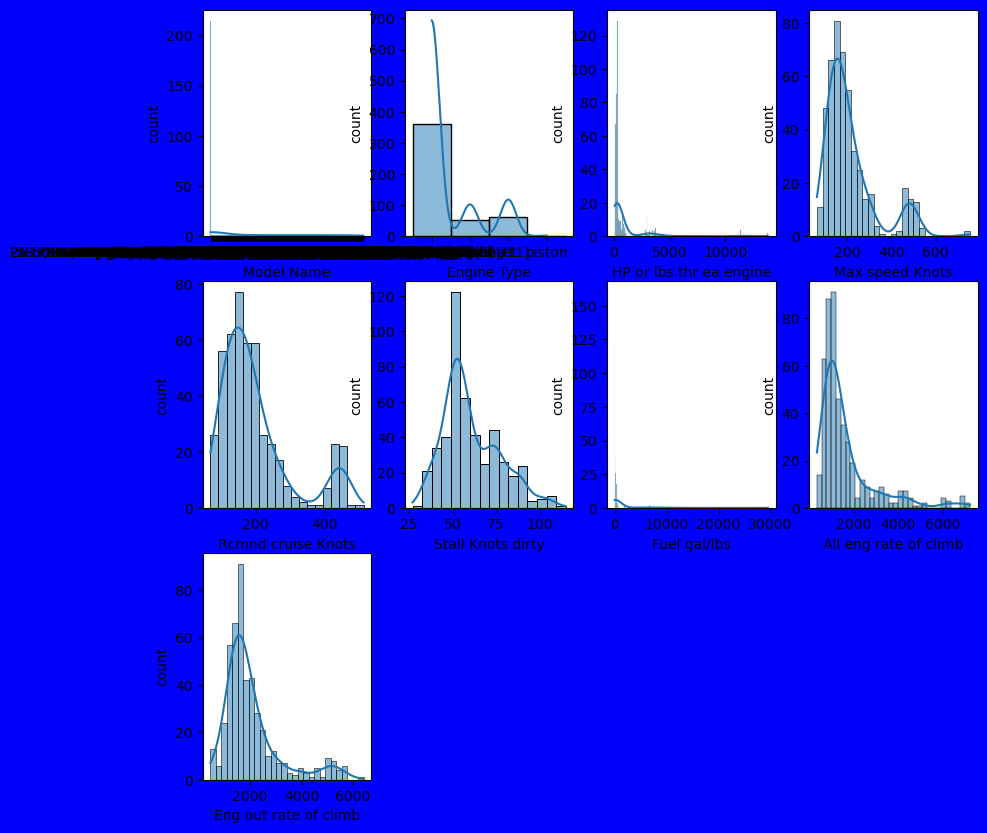

In [23]:
plt.figure(figsize=(10,10), facecolor="blue")
plot=1

for columns in d:
    if plot <=9:
        ax=plt.subplot(3,4,plot)
        sns.histplot(d[columns], kde=True)
        plt.xlabel(columns, fontsize=10)
        plt.ylabel("count", fontsize=10)
    plot+=1
plt.tight_layout

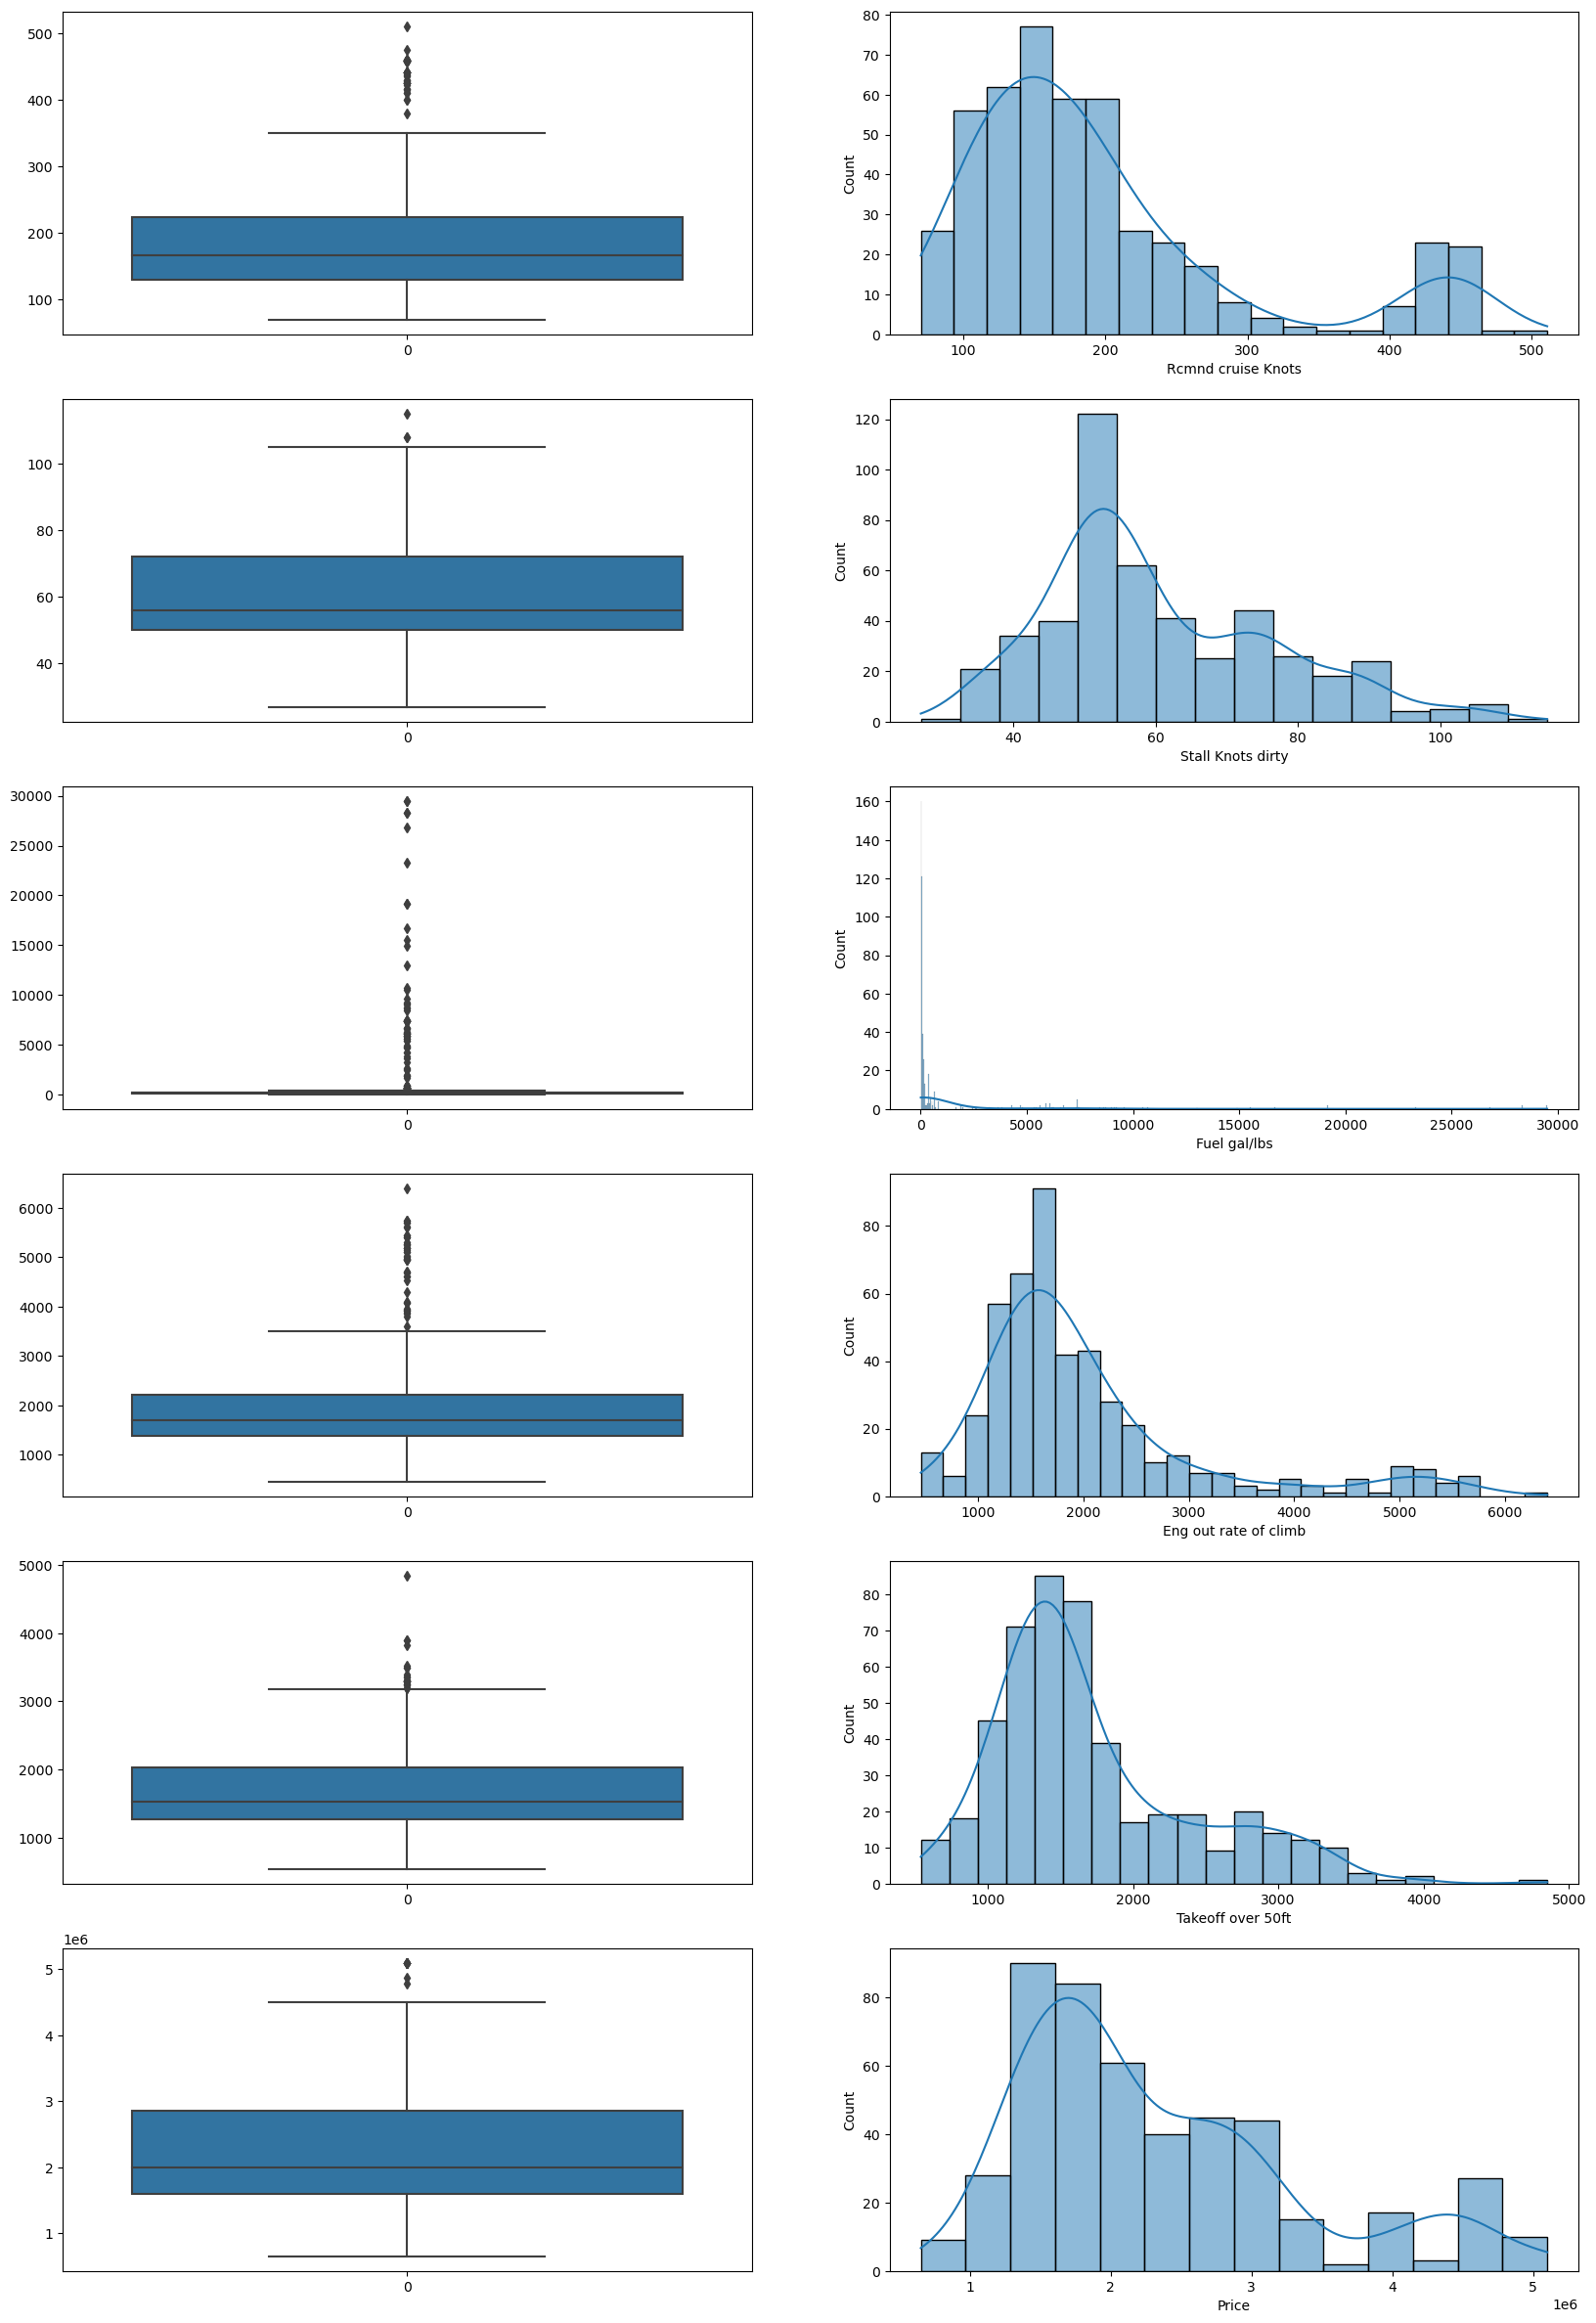

In [24]:
fig,ax=plt.subplots(6,2,figsize=(20,30))
m,n=0,0

for columns in d_float:
    sns.boxplot(d[columns],ax=ax[m][n])
    sns.histplot(d[columns], kde=True, ax=ax[m][n+1])
    m+=1

In [25]:
cat=[]
for col in d.columns:
    if d[col].dtype==object and len(d[col].unique())<=200:
        cat.append(col)
        print(f"{col}:{d[col].unique ()}") #output
        print("===================================")
    

Engine Type:['Piston' 'Propjet' 'Jet' 'piston']


In [26]:
d['Wing span ft/in'].unique()

array([37., 36., 35., 34., 42., 30., 27., 32., 33., 31., 24., 44., 56.,
       54., 57., 45., 50., 39., 49., 47., 38., 43., 61., 63., 53., 55.,
       52., 46., 41., 40., 16., 65., 29., 28., 20., 77., 72., 68., 78.,
       nan], dtype=float32)

In [27]:
d

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145.0,104.0,91.0,46.0,36.0,450.0,900.0,1300.0,2050.0,1180.0,25.0,37.0,370.0,1300000.0
1,7 CCM Champ,Piston,85.0,89.0,83.0,44.0,15.0,600.0,720.0,800.0,1350.0,820.0,20.0,36.0,190.0,1230000.0
2,100 Darter (S.L. Industries),Piston,90.0,90.0,78.0,37.0,19.0,650.0,475.0,850.0,1300.0,810.0,21.0,35.0,210.0,1600000.0
3,7 AC Champ,Piston,85.0,88.0,78.0,37.0,19.0,620.0,500.0,850.0,1300.0,800.0,21.0,35.0,210.0,1300000.0
4,100 Darter (S.L. Industries),Piston,65.0,83.0,74.0,33.0,14.0,370.0,632.0,885.0,1220.0,740.0,21.0,35.0,175.0,1250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,500 A,Propjet,1000.0,351.0,334.0,56.0,3819.0,3242.0,1930.0,2280.0,12050.0,7856.0,43.0,47.0,1879.0,4100000.0
513,100 Darter (S.L. Industries),Propjet,720.0,312.0,288.0,89.0,578.0,2380.0,2280.0,3043.0,11200.0,6837.0,43.0,47.0,1722.0,3584000.0
514,520,Propjet,720.0,290.0,275.0,87.0,390.0,2236.0,3230.0,3017.0,11200.0,6389.0,43.0,47.0,1515.0,3200000.0
515,2180,Propjet,620.0,275.0,270.0,77.0,382.0,1750.0,2940.0,2446.0,9474.0,5164.0,36.0,42.0,1336.0,3240000.0


In [28]:
d.drop('Model Name',axis=1)

,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,Piston,145.0,104.0,91.0,46.0,36.0,450.0,900.0,1300.0,2050.0,1180.0,25.0,37.0,370.0,1300000.0
1,Piston,85.0,89.0,83.0,44.0,15.0,600.0,720.0,800.0,1350.0,820.0,20.0,36.0,190.0,1230000.0
2,Piston,90.0,90.0,78.0,37.0,19.0,650.0,475.0,850.0,1300.0,810.0,21.0,35.0,210.0,1600000.0
3,Piston,85.0,88.0,78.0,37.0,19.0,620.0,500.0,850.0,1300.0,800.0,21.0,35.0,210.0,1300000.0
4,Piston,65.0,83.0,74.0,33.0,14.0,370.0,632.0,885.0,1220.0,740.0,21.0,35.0,175.0,1250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,Propjet,1000.0,351.0,334.0,56.0,3819.0,3242.0,1930.0,2280.0,12050.0,7856.0,43.0,47.0,1879.0,4100000.0
513,Propjet,720.0,312.0,288.0,89.0,578.0,2380.0,2280.0,3043.0,11200.0,6837.0,43.0,47.0,1722.0,3584000.0
514,Propjet,720.0,290.0,275.0,87.0,390.0,2236.0,3230.0,3017.0,11200.0,6389.0,43.0,47.0,1515.0,3200000.0
515,Propjet,620.0,275.0,270.0,77.0,382.0,1750.0,2940.0,2446.0,9474.0,5164.0,36.0,42.0,1336.0,3240000.0


In [29]:
da=d.copy()

In [30]:
da

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145.0,104.0,91.0,46.0,36.0,450.0,900.0,1300.0,2050.0,1180.0,25.0,37.0,370.0,1300000.0
1,7 CCM Champ,Piston,85.0,89.0,83.0,44.0,15.0,600.0,720.0,800.0,1350.0,820.0,20.0,36.0,190.0,1230000.0
2,100 Darter (S.L. Industries),Piston,90.0,90.0,78.0,37.0,19.0,650.0,475.0,850.0,1300.0,810.0,21.0,35.0,210.0,1600000.0
3,7 AC Champ,Piston,85.0,88.0,78.0,37.0,19.0,620.0,500.0,850.0,1300.0,800.0,21.0,35.0,210.0,1300000.0
4,100 Darter (S.L. Industries),Piston,65.0,83.0,74.0,33.0,14.0,370.0,632.0,885.0,1220.0,740.0,21.0,35.0,175.0,1250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,500 A,Propjet,1000.0,351.0,334.0,56.0,3819.0,3242.0,1930.0,2280.0,12050.0,7856.0,43.0,47.0,1879.0,4100000.0
513,100 Darter (S.L. Industries),Propjet,720.0,312.0,288.0,89.0,578.0,2380.0,2280.0,3043.0,11200.0,6837.0,43.0,47.0,1722.0,3584000.0
514,520,Propjet,720.0,290.0,275.0,87.0,390.0,2236.0,3230.0,3017.0,11200.0,6389.0,43.0,47.0,1515.0,3200000.0
515,2180,Propjet,620.0,275.0,270.0,77.0,382.0,1750.0,2940.0,2446.0,9474.0,5164.0,36.0,42.0,1336.0,3240000.0


In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
da['Engine Type']=le.fit_transform(da['Engine Type'])

In [35]:
da

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,0,1,145.0,104.0,91.0,46.0,36.0,450.0,900.0,1300.0,2050.0,1180.0,25.0,37.0,370.0,1300000.0
1,98,1,85.0,89.0,83.0,44.0,15.0,600.0,720.0,800.0,1350.0,820.0,20.0,36.0,190.0,1230000.0
2,0,1,90.0,90.0,78.0,37.0,19.0,650.0,475.0,850.0,1300.0,810.0,21.0,35.0,210.0,1600000.0
3,97,1,85.0,88.0,78.0,37.0,19.0,620.0,500.0,850.0,1300.0,800.0,21.0,35.0,210.0,1300000.0
4,0,1,65.0,83.0,74.0,33.0,14.0,370.0,632.0,885.0,1220.0,740.0,21.0,35.0,175.0,1250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,77,2,1000.0,351.0,334.0,56.0,3819.0,3242.0,1930.0,2280.0,12050.0,7856.0,43.0,47.0,1879.0,4100000.0
513,0,2,720.0,312.0,288.0,89.0,578.0,2380.0,2280.0,3043.0,11200.0,6837.0,43.0,47.0,1722.0,3584000.0
514,79,2,720.0,290.0,275.0,87.0,390.0,2236.0,3230.0,3017.0,11200.0,6389.0,43.0,47.0,1515.0,3200000.0
515,55,2,620.0,275.0,270.0,77.0,382.0,1750.0,2940.0,2446.0,9474.0,5164.0,36.0,42.0,1336.0,3240000.0


In [39]:
da['Engine Type'].unique()

array([1, 2, 0, 3])

In [43]:
da.drop('Model Name',axis=1, inplace=True)

In [44]:
da

,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,1,145.0,104.0,91.0,46.0,36.0,450.0,900.0,1300.0,2050.0,1180.0,25.0,37.0,370.0,1300000.0
1,1,85.0,89.0,83.0,44.0,15.0,600.0,720.0,800.0,1350.0,820.0,20.0,36.0,190.0,1230000.0
2,1,90.0,90.0,78.0,37.0,19.0,650.0,475.0,850.0,1300.0,810.0,21.0,35.0,210.0,1600000.0
3,1,85.0,88.0,78.0,37.0,19.0,620.0,500.0,850.0,1300.0,800.0,21.0,35.0,210.0,1300000.0
4,1,65.0,83.0,74.0,33.0,14.0,370.0,632.0,885.0,1220.0,740.0,21.0,35.0,175.0,1250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,2,1000.0,351.0,334.0,56.0,3819.0,3242.0,1930.0,2280.0,12050.0,7856.0,43.0,47.0,1879.0,4100000.0
513,2,720.0,312.0,288.0,89.0,578.0,2380.0,2280.0,3043.0,11200.0,6837.0,43.0,47.0,1722.0,3584000.0
514,2,720.0,290.0,275.0,87.0,390.0,2236.0,3230.0,3017.0,11200.0,6389.0,43.0,47.0,1515.0,3200000.0
515,2,620.0,275.0,270.0,77.0,382.0,1750.0,2940.0,2446.0,9474.0,5164.0,36.0,42.0,1336.0,3240000.0


In [45]:
da.corr()

,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
Engine Type,1.000000,-0.535213,-0.392457,-0.458907,-0.211163,-0.511057,-0.450210,-0.482385,-0.330913,-0.374880,-0.345758,-0.023000,-0.047597,-0.257644,-0.366483
HP or lbs thr ea engine,-0.535213,1.000000,0.693887,0.742755,0.599049,0.961456,0.665517,0.773382,0.639857,0.955677,0.943577,0.059725,0.692769,0.783156,0.663134
Max speed Knots,-0.392457,0.693887,1.000000,0.866671,0.764190,0.645063,0.830896,0.759612,0.744161,0.716374,0.710668,0.028879,0.544153,0.738454,0.874481
Rcmnd cruise Knots,-0.458907,0.742755,0.866671,1.000000,0.813926,0.682788,0.903071,0.824056,0.827295,0.751927,0.747564,0.018047,0.582970,0.793456,0.902792
Stall Knots dirty,-0.211163,0.599049,0.764190,0.813926,1.000000,0.542772,0.761240,0.728610,0.792462,0.672757,0.685714,0.037726,0.613051,0.708192,0.785418
Fuel gal/lbs,-0.511057,0.961456,0.645063,0.682788,0.542772,1.000000,0.575331,0.738554,0.588291,0.959925,0.944336,0.051024,0.704992,0.793021,0.602654
All eng rate of climb,-0.450210,0.665517,0.830896,0.903071,0.761240,0.575331,1.000000,0.730124,0.741177,0.634139,0.625684,0.048108,0.441953,0.646880,0.855604
Eng out rate of climb,-0.482385,0.773382,0.759612,0.824056,0.728610,0.738554,0.730124,1.000000,0.857572,0.775714,0.766546,0.052240,0.590263,0.771587,0.769764
Takeoff over 50ft,-0.330913,0.639857,0.744161,0.827295,0.792462,0.588291,0.741177,0.857572,1.000000,0.683107,0.681966,-0.015217,0.609135,0.743232,0.788488
Landing over 50ft,-0.374880,0.955677,0.716374,0.751927,0.672757,0.959925,0.634139,0.775714,0.683107,1.000000,0.994651,0.041322,0.820788,0.854956,0.682253


<Axes: >

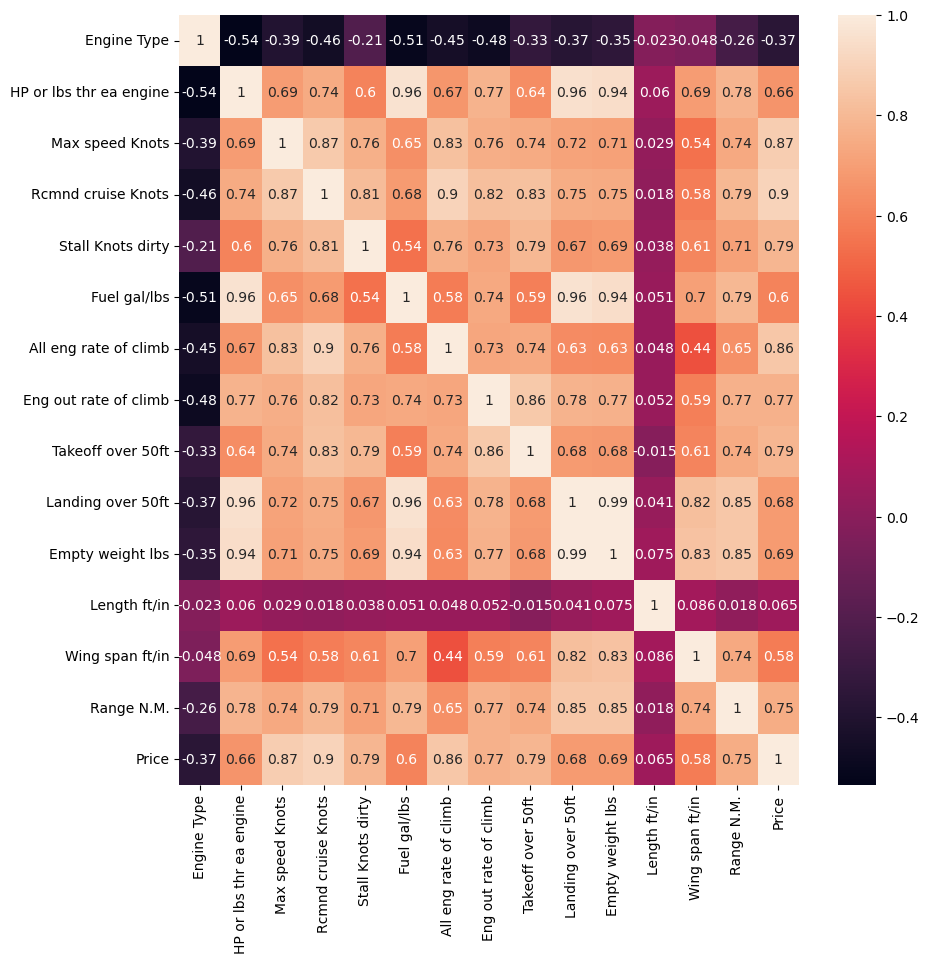

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(da.corr(),annot=True)

In [53]:
d1=da[['Engine Type','HP or lbs thr ea engine','Max speed Knots','Rcmnd cruise Knots','Stall Knots dirty','Fuel gal/lbs','All eng rate of climb','Eng out rate of climb','Takeoff over 50ft','Landing over 50ft','Empty weight lbs','Length ft/in','Wing span ft/in','Range N.M.']]

In [54]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_d1=pd.DataFrame(pca.fit_transform(d1))
pca.explained_variance_

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error, explained_variance_score, mean_absolute_percentage_error

In [102]:
x=da.drop(['Price'],axis=1)
y=da['Price']

In [103]:
x

,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.
0,1,145.0,104.0,91.0,46.0,36.0,450.0,900.0,1300.0,2050.0,1180.0,25.0,37.0,370.0
1,1,85.0,89.0,83.0,44.0,15.0,600.0,720.0,800.0,1350.0,820.0,20.0,36.0,190.0
2,1,90.0,90.0,78.0,37.0,19.0,650.0,475.0,850.0,1300.0,810.0,21.0,35.0,210.0
3,1,85.0,88.0,78.0,37.0,19.0,620.0,500.0,850.0,1300.0,800.0,21.0,35.0,210.0
4,1,65.0,83.0,74.0,33.0,14.0,370.0,632.0,885.0,1220.0,740.0,21.0,35.0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,2,1000.0,351.0,334.0,56.0,3819.0,3242.0,1930.0,2280.0,12050.0,7856.0,43.0,47.0,1879.0
513,2,720.0,312.0,288.0,89.0,578.0,2380.0,2280.0,3043.0,11200.0,6837.0,43.0,47.0,1722.0
514,2,720.0,290.0,275.0,87.0,390.0,2236.0,3230.0,3017.0,11200.0,6389.0,43.0,47.0,1515.0
515,2,620.0,275.0,270.0,77.0,382.0,1750.0,2940.0,2446.0,9474.0,5164.0,36.0,42.0,1336.0


In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [105]:
!pip install xgboost

In [106]:
from xgboost import XGBRegressor as xGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
xgb = xGBRegressor() 
xgb.fit(x_train,y_train)
xgbtd=xgb.predict(x_test)
xgbr2=r2_score(y_test,xgbtd)

In [107]:
xgbr2

0.8844874547806892